### **1. Distribuzioni di probabilità**
Genera 1000 valori casuali da una distribuzione gamma con parametro di forma pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

Stima il parametro di forma dal campione usando il metodo fit.

Extra:
Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

Traccia la funzione di distribuzione cumulativa (CDF).

Calcola la varianza.

In [ ]:
%conda install scipy

Parametro di forma del campione (shape, loc, scale): (np.float64(0.9683106714969821), np.float64(0.0014771680834180288), np.float64(1.0120673241627778))
Varianza: 0.9925911673226467


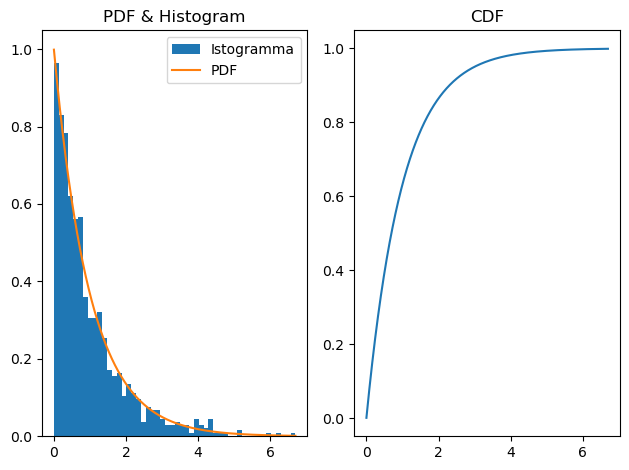

In [32]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

shape_parameter = 1
sample = gamma.rvs(shape_parameter, size=1000)
plt.subplot(1,2,1)
plt.hist(sample, bins=50, density=True, label='Istogramma')

x = np.linspace(np.min(sample), np.max(sample), 1000)
plt.plot(x, gamma.pdf(x, shape_parameter), label='PDF')
plt.title("PDF & Histogram")
plt.legend()

print(f"Parametro di forma del campione (shape, loc, scale): {gamma.fit(sample)}")

plt.subplot(1,2,2)
plt.plot(x, gamma.cdf(x, shape_parameter), label='CDF')
plt.title("CDF")
plt.tight_layout()

print(f"Varianza: {np.var(sample)}")

### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

temp_max: MAE= 2.566, RMSE= 2.895
temp_min: MAE= 6.359, RMSE= 7.419


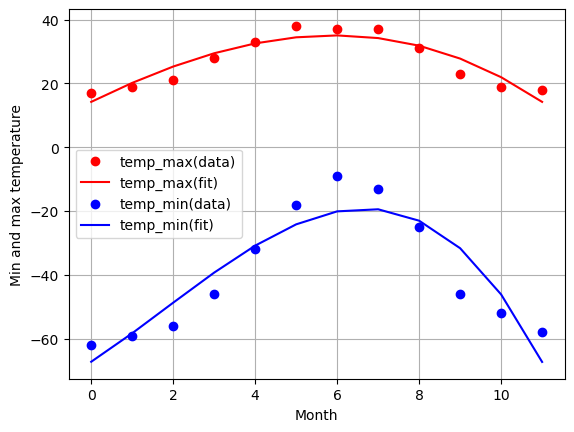

In [1]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)

#fitting di modelli polinomiali di grado 3
coeffs_max = np.polyfit(months, temp_max, 3)
coeffs_min = np.polyfit(months, temp_min, 3)

poly_max = np.poly1d(coeffs_max)
poly_min = np.poly1d(coeffs_min)

#predizioni
pred_max = poly_max(months)
pred_min = poly_min(months)

#MAE ed RMSE
import math
def calculate_mae(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza")
    errors = [np.abs(y_real[i] - y_pred[i]) for i in range(len(y_real))]
    return sum(errors) / len(errors)

def calculate_rmse(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza")
    errors = [(y_real[i] - y_pred[i])**2 for i in range(len(y_real))]
    mse = sum(errors) / len(errors)
    return math.sqrt(mse)

mae_max = calculate_mae(temp_max, pred_max)
rmse_max = calculate_rmse(temp_max, pred_max)
print(f"temp_max: MAE={mae_max: .3f}, RMSE={rmse_max: .3f}")

mae_min = calculate_mae(temp_min, pred_min)
rmse_min = calculate_rmse(temp_min, pred_min)
print(f"temp_min: MAE={mae_min: .3f}, RMSE={rmse_min: .3f}")

#plot
plt.plot(months, temp_max, "ro", label='temp_max(data)')
plt.plot(months, pred_max, "r-", label='temp_max(fit)')
plt.plot(months, temp_min, "bo", label='temp_min(data)')
plt.plot(months, pred_min, "b-", label='temp_min(fit)')
plt.xlabel("Month")
plt.ylabel("Min and max temperature")
plt.legend()
plt.grid()
plt.show()


### **3. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

MAE: 2.605
RMSE: 3.148
R²: 0.718


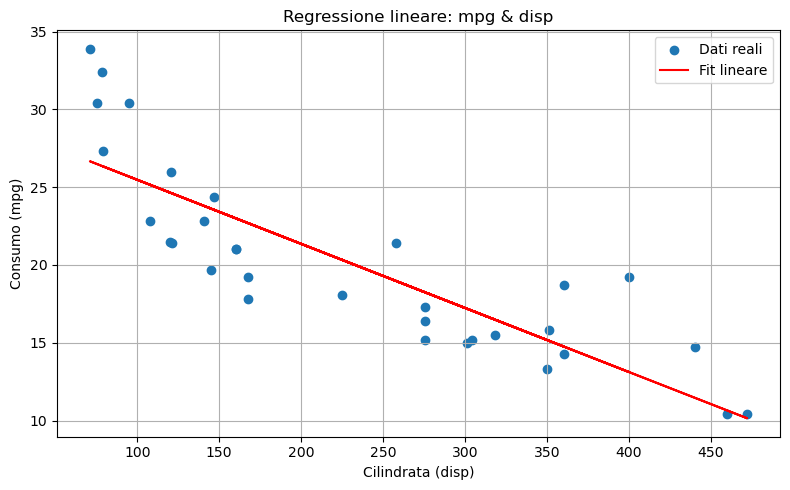

In [44]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df

#estraggo valori
x = df['disp'].values
y = df['mpg'].values

#modello lineare
def lineare(x, a, b):
    return a * x + b

#fit
popt, _ = sp.optimize.curve_fit(lineare, x, y)
y_pred = lineare(x, *popt)

#metriche
mae = np.mean(np.abs(y - y_pred))
rmse = np.sqrt(np.mean((y - y_pred)**2))
ss_tot = sum((y - np.mean(y))**2)
ss_res = sum((y - y_pred)**2)
r2 = 1 - ss_res / ss_tot

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

#plot
plt.figure(figsize=(8,5))
plt.scatter(x, y, label='Dati reali')
plt.plot(x, y_pred, label='Fit lineare', color='red')
plt.legend()
plt.xlabel("Cilindrata (disp)")
plt.ylabel("Consumo (mpg)")
plt.title("Regressione lineare: mpg & disp")
plt.grid(True)
plt.tight_layout()
plt.show()